In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
import seaborn as sns 
from sklearn.ensemble import RandomForestClassifier
from sklearn import datasets
from sklearn import metrics
from sklearn.model_selection import train_test_split

In [2]:
!gdown --id '1fpmRXRYFEvuujjxHTm05lFLLI-8_T-Y5' --output level-6.csv

Downloading...
From: https://drive.google.com/uc?id=1fpmRXRYFEvuujjxHTm05lFLLI-8_T-Y5
To: /content/level-6.csv
100% 183k/183k [00:00<00:00, 2.85MB/s]


In [3]:
train = pd.read_csv("level-6.csv")
train.head()

,index,Bacteria;Abditibacteriota;Abditibacteria;Abditibacteriales;Abditibacteriaceae;Abditibacterium,Bacteria;Acidobacteriota;Acidobacteriae;Subgroup_2;__;__,Bacteria;Actinobacteria;Actinobacteria;Actinomycetales;Actinomycetaceae;Actinomyces,Bacteria;Actinobacteriota;Acidimicrobiia;Microtrichales;Ilumatobacteraceae;uncultured,Bacteria;Actinobacteriota;Acidimicrobiia;uncultured;uncultured_forest_soil_bacterium;,Bacteria;Actinobacteriota;Actinobacteria;Actinomycetales;Actinomycetaceae;Actinomyces,Bacteria;Actinobacteriota;Actinobacteria;Actinomycetales;Actinomycetaceae;F0332,Bacteria;Actinobacteriota;Actinobacteria;Actinomycetales;Actinomycetaceae;Varibaculum,Bacteria;Actinobacteriota;Actinobacteria;Bifidobacteriales;Bifidobacteriaceae;Bifidobacterium,Bacteria;Actinobacteriota;Actinobacteria;Bifidobacteriales;Bifidobacteriaceae;Gardnerella,Bacteria;Actinobacteriota;Actinobacteria;Corynebacteriales;Corynebacteriaceae;Corynebacterium,Bacteria;Actinobacteriota;Actinobacteria;Corynebacteriales;Corynebacteriaceae;Lawsonella,Bacteria;Actinobacteriota;Actinobacteria;Corynebacteriales;Dietziaceae;Dietzia,Bacteria;Actinobacteriota;Actinobacteria;Corynebacteriales;Mycobacteriaceae;Mycobacterium,Bacteria;Actinobacteriota;Actinobacteria;Corynebacteriales;Nocardiaceae;Gordonia,Bacteria;Actinobacteriota;Actinobacteria;Corynebacteriales;Nocardiaceae;Rhodococcus,Bacteria;Actinobacteriota;Actinobacteria;Corynebacteriales;Nocardiaceae;Williamsia,Bacteria;Actinobacteriota;Actinobacteria;Frankiales;Geodermatophilaceae;Blastococcus,Bacteria;Actinobacteriota;Actinobacteria;Frankiales;Geodermatophilaceae;Modestobacter,Bacteria;Actinobacteriota;Actinobacteria;Frankiales;Sporichthyaceae;uncultured,Bacteria;Actinobacteriota;Actinobacteria;Frankiales;__;__,Bacteria;Actinobacteriota;Actinobacteria;Frankiales;uncultured;Actinomycetales_bacterium,Bacteria;Actinobacteriota;Actinobacteria;Frankiales;uncultured;__,Bacteria;Actinobacteriota;Actinobacteria;Kineosporiales;Kineosporiaceae;Quadrisphaera,Bacteria;Actinobacteriota;Actinobacteria;Micrococcales;Beutenbergiaceae;Miniimonas,Bacteria;Actinobacteriota;Actinobacteria;Micrococcales;Bogoriellaceae;Georgenia,Bacteria;Actinobacteriota;Actinobacteria;Micrococcales;Brevibacteriaceae;Brevibacterium,Bacteria;Actinobacteriota;Actinobacteria;Micrococcales;Dermabacteraceae;Brachybacterium,Bacteria;Actinobacteriota;Actinobacteria;Micrococcales;Dermabacteraceae;Dermabacter,Bacteria;Actinobacteriota;Actinobacteria;Micrococcales;Dermacoccaceae;Barrientosiimonas,Bacteria;Actinobacteriota;Actinobacteria;Micrococcales;Dermacoccaceae;Dermacoccus,Bacteria;Actinobacteriota;Actinobacteria;Micrococcales;Intrasporangiaceae;Janibacter,Bacteria;Actinobacteriota;Actinobacteria;Micrococcales;Intrasporangiaceae;Lapillicoccus,Bacteria;Actinobacteriota;Actinobacteria;Micrococcales;Intrasporangiaceae;Ornithinicoccus,Bacteria;Actinobacteriota;Actinobacteria;Micrococcales;Intrasporangiaceae;Ornithinimicrobium,Bacteria;Actinobacteriota;Actinobacteria;Micrococcales;Intrasporangiaceae;Serinicoccus,Bacteria;Actinobacteriota;Actinobacteria;Micrococcales;Intrasporangiaceae;__,Bacteria;Actinobacteriota;Actinobacteria;Micrococcales;Microbacteriaceae;Agrococcus,Bacteria;Actinobacteriota;Actinobacteria;Micrococcales;Microbacteriaceae;Amnibacterium,...,Bacteria;Proteobacteria;Gammaproteobacteria;Legionellales;Legionellaceae;Legionella,Bacteria;Proteobacteria;Gammaproteobacteria;Oceanospirillales;Halomonadaceae;Halomonas,Bacteria;Proteobacteria;Gammaproteobacteria;Orbales;Orbaceae;Gilliamella,Bacteria;Proteobacteria;Gammaproteobacteria;Pasteurellales;Pasteurellaceae;Actinobacillus,Bacteria;Proteobacteria;Gammaproteobacteria;Pasteurellales;Pasteurellaceae;Aggregatibacter,Bacteria;Proteobacteria;Gammaproteobacteria;Pasteurellales;Pasteurellaceae;Haemophilus,Bacteria;Proteobacteria;Gammaproteobacteria;Pasteurellales;Pasteurellaceae;Pasteurella,Bacteria;Proteobacteria;Gammaproteobacteria;Pasteurellales;Pasteurellaceae;__,Bacteria;Proteobacteria;Gammaproteob

In [4]:
shortrun = train[train['merged'] < 19250].index
train = train.drop(shortrun,axis=0)
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 130 entries, 0 to 167
Columns: 371 entries, index to Clinical
dtypes: float64(368), int64(1), object(2)
memory usage: 377.8+ KB


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 130 entries, 0 to 167
Columns: 371 entries, index to Clinical
dtypes: float64(368), int64(1), object(2)
memory usage: 377.8+ KB


In [6]:
CAT_COL = ["index", "Clinical"]

NUM_COL=[]
for i in range(len(train.columns)):
  NUM_COL.append(train.columns[i])
NUM_COL.remove('index')
NUM_COL.remove('Clinical')

cat_col = []
num_col = []
for col in train:
  if col in CAT_COL:
    cat_col.append(col)
  elif col in NUM_COL:
    num_col.append(col)
for col in cat_col:
  train[col] = train[col].astype(str)

df_cat = train.loc[:,cat_col] # take all the categorical columns
df_cat = pd.get_dummies(df_cat) # one hot encoding

df_num = train.loc[:,num_col] # take all the numerical columns
df_final = pd.concat([df_cat, df_num], axis=1) # concat categorical/numerical data

In [7]:
df_final.head()

,index_SRR10717942,index_SRR10717943,index_SRR10717944,index_SRR10717945,index_SRR10717947,index_SRR10717950,index_SRR10717951,index_SRR10717952,index_SRR10717953,index_SRR10717954,index_SRR10717956,index_SRR10717957,index_SRR10717958,index_SRR10717959,index_SRR10717960,index_SRR10717961,index_SRR10717963,index_SRR10717964,index_SRR10717965,index_SRR10717966,index_SRR10717967,index_SRR10717968,index_SRR10717969,index_SRR10717970,index_SRR10717971,index_SRR10717972,index_SRR10717973,index_SRR10717974,index_SRR10717975,index_SRR10717976,index_SRR10717977,index_SRR10717978,index_SRR10717979,index_SRR10717980,index_SRR10717981,index_SRR10717983,index_SRR10717984,index_SRR10717985,index_SRR10717986,index_SRR10717988,...,Bacteria;Proteobacteria;Gammaproteobacteria;Enterobacterales;Yersiniaceae;Serratia,Bacteria;Proteobacteria;Gammaproteobacteria;Legionellales;Legionellaceae;Legionella,Bacteria;Proteobacteria;Gammaproteobacteria;Oceanospirillales;Halomonadaceae;Halomonas,Bacteria;Proteobacteria;Gammaproteobacteria;Orbales;Orbaceae;Gilliamella,Bacteria;Proteobacteria;Gammaproteobacteria;Pasteurellales;Pasteurellaceae;Actinobacillus,Bacteria;Proteobacteria;Gammaproteobacteria;Pasteurellales;Pasteurellaceae;Aggregatibacter,Bacteria;Proteobacteria;Gammaproteobacteria;Pasteurellales;Pasteurellaceae;Haemophilus,Bacteria;Proteobacteria;Gammaproteobacteria;Pasteurellales;Pasteurellaceae;Pasteurella,Bacteria;Proteobacteria;Gammaproteobacteria;Pasteurellales;Pasteurellaceae;__,Bacteria;Proteobacteria;Gammaproteobacteria;Pseudomonadales;Moraxellaceae;Acinetobacter,Bacteria;Proteobacteria;Gammaproteobacteria;Pseudomonadales;Moraxellaceae;Alkanindiges,Bacteria;Proteobacteria;Gammaproteobacteria;Pseudomonadales;Moraxellaceae;Enhydrobacter,Bacteria;Proteobacteria;Gammaproteobacteria;Pseudomonadales;Moraxellaceae;Moraxella,Bacteria;Proteobacteria;Gammaproteobacteria;Pseudomonadales;Moraxellaceae;Psychrobacter,Bacteria;Proteobacteria;Gammaproteobacteria;Pseudomonadales;Moraxellaceae;__,Bacteria;Proteobacteria;Gammaproteobacteria;Pseudomonadales;Moraxellaceae;uncultured,Bacteria;Proteobacteria;Gammaproteobacteria;Pseudomonadales;Pseudomonadaceae;Pseudomonas,Bacteria;Proteobacteria;Gammaproteobacteria;Pseudomonadales;__;__,Bacteria;Proteobacteria;Gammaproteobacteria;Salinisphaerales;Solimonadaceae;Nevskia,Bacteria;Proteobacteria;Gammaproteobacteria;Thiotrichales;Thiotrichaceae;Thiothrix,Bacteria;Proteobacteria;Gammaproteobacteria;Vibrionales;Vibrionaceae;Photobacterium,Bacteria;Proteobacteria;Gammaproteobacteria;Vibrionales;Vibrionaceae;Vibrio,Bacteria;Proteobacteria;Gammaproteobacteria;Xanthomonadales;Rhodanobacteraceae;Ahniella,Bacteria;Proteobacteria;Gammaproteobacteria;Xanthomonadales;Rhodanobacteraceae;Pseudofulvimonas,Bacteria;Proteobacteria;Gammaproteobacteria;Xanthomonadales;Rhodanobacteraceae;Rhodanobacter,Bacteria;Proteobacteria;Gammaproteobacteria;Xanthomonadales;Xanthomonadaceae;Luteimonas,Bacteria;Proteobacteria;Gammaproteobacteria;Xanthomonadales;Xanthomonadaceae;Lysobacter,Bacteria;Proteobacteria;Gammaproteobacteria;Xanthomonadales;Xanthomonadaceae;Pseudoxanthomonas,Bacteria;Proteobacteria;Gammaproteobacteria;Xanthomonadales;Xanthomonadaceae;Stenotrophomonas,Bacteria;Proteobacteria;Gammaproteobacteria;Xanthomonadales;Xanthomonadaceae;Xanthomonas,Bacteria;Proteobacteria;Gammaproteobacteria;__;__;__,Bacteria;Proteobacteria;__;__;__;__,Bacteria;SAR324_clade(Marine_group_B);uncultured_bacterium;;__;__,Bacteria;Spirochaetota;Spirochaetia;Spirochaetales;Spirochaetaceae;Treponema,Bacteria;Synergistota;Synergistia;Synergistales;Synergistaceae;Fretibacterium,Bacteria;Verrucomicrobiota;Chlamydiae;Chlamydiales;__;__,Bacteria;Verrucomicrobiota;Omnitrophia;Omnitrophales;Omnitrophaceae;Candidatus_Omnitrophus,Bacteria;__;__;__;__;__,Unassigned;__;__;__;__;__,merged
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.060593,0.0,0.0,0.000477,0.0,0.084239,0.0,0.0,0.0,0.0,0.013825,0.0,0.0,0.0,0.0,

In [8]:
not_select = ["index", "Clinical", "merged"]
train_select = train.drop(not_select,axis=1)
train_select.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 130 entries, 0 to 167
Columns: 368 entries, Bacteria;Abditibacteriota;Abditibacteria;Abditibacteriales;Abditibacteriaceae;Abditibacterium to Unassigned;__;__;__;__;__
dtypes: float64(368)
memory usage: 374.8 KB


In [9]:
cat_col = []
num_col = []
for col in train_select:
  if col in CAT_COL:
    cat_col.append(col)
  elif col in NUM_COL:
    num_col.append(col)

for col in cat_col:
  if train_select[col].dtype != "O":
    # print(col)
    train_select[col] = train_select[col].astype(str)

df_cat_select = train_select.loc[:,cat_col] # take all the categorical columns
#df_cat_select = pd.get_dummies(df_cat_select) # one hot encoding

df_num_select = train_select.loc[:,num_col] # take all the numerical columns
df_final_select = pd.concat([df_cat_select, df_num_select], axis=1) # concat categorical/numerical data

In [10]:
df_final_select.head()

,Bacteria;Abditibacteriota;Abditibacteria;Abditibacteriales;Abditibacteriaceae;Abditibacterium,Bacteria;Acidobacteriota;Acidobacteriae;Subgroup_2;__;__,Bacteria;Actinobacteria;Actinobacteria;Actinomycetales;Actinomycetaceae;Actinomyces,Bacteria;Actinobacteriota;Acidimicrobiia;Microtrichales;Ilumatobacteraceae;uncultured,Bacteria;Actinobacteriota;Acidimicrobiia;uncultured;uncultured_forest_soil_bacterium;,Bacteria;Actinobacteriota;Actinobacteria;Actinomycetales;Actinomycetaceae;Actinomyces,Bacteria;Actinobacteriota;Actinobacteria;Actinomycetales;Actinomycetaceae;F0332,Bacteria;Actinobacteriota;Actinobacteria;Actinomycetales;Actinomycetaceae;Varibaculum,Bacteria;Actinobacteriota;Actinobacteria;Bifidobacteriales;Bifidobacteriaceae;Bifidobacterium,Bacteria;Actinobacteriota;Actinobacteria;Bifidobacteriales;Bifidobacteriaceae;Gardnerella,Bacteria;Actinobacteriota;Actinobacteria;Corynebacteriales;Corynebacteriaceae;Corynebacterium,Bacteria;Actinobacteriota;Actinobacteria;Corynebacteriales;Corynebacteriaceae;Lawsonella,Bacteria;Actinobacteriota;Actinobacteria;Corynebacteriales;Dietziaceae;Dietzia,Bacteria;Actinobacteriota;Actinobacteria;Corynebacteriales;Mycobacteriaceae;Mycobacterium,Bacteria;Actinobacteriota;Actinobacteria;Corynebacteriales;Nocardiaceae;Gordonia,Bacteria;Actinobacteriota;Actinobacteria;Corynebacteriales;Nocardiaceae;Rhodococcus,Bacteria;Actinobacteriota;Actinobacteria;Corynebacteriales;Nocardiaceae;Williamsia,Bacteria;Actinobacteriota;Actinobacteria;Frankiales;Geodermatophilaceae;Blastococcus,Bacteria;Actinobacteriota;Actinobacteria;Frankiales;Geodermatophilaceae;Modestobacter,Bacteria;Actinobacteriota;Actinobacteria;Frankiales;Sporichthyaceae;uncultured,Bacteria;Actinobacteriota;Actinobacteria;Frankiales;__;__,Bacteria;Actinobacteriota;Actinobacteria;Frankiales;uncultured;Actinomycetales_bacterium,Bacteria;Actinobacteriota;Actinobacteria;Frankiales;uncultured;__,Bacteria;Actinobacteriota;Actinobacteria;Kineosporiales;Kineosporiaceae;Quadrisphaera,Bacteria;Actinobacteriota;Actinobacteria;Micrococcales;Beutenbergiaceae;Miniimonas,Bacteria;Actinobacteriota;Actinobacteria;Micrococcales;Bogoriellaceae;Georgenia,Bacteria;Actinobacteriota;Actinobacteria;Micrococcales;Brevibacteriaceae;Brevibacterium,Bacteria;Actinobacteriota;Actinobacteria;Micrococcales;Dermabacteraceae;Brachybacterium,Bacteria;Actinobacteriota;Actinobacteria;Micrococcales;Dermabacteraceae;Dermabacter,Bacteria;Actinobacteriota;Actinobacteria;Micrococcales;Dermacoccaceae;Barrientosiimonas,Bacteria;Actinobacteriota;Actinobacteria;Micrococcales;Dermacoccaceae;Dermacoccus,Bacteria;Actinobacteriota;Actinobacteria;Micrococcales;Intrasporangiaceae;Janibacter,Bacteria;Actinobacteriota;Actinobacteria;Micrococcales;Intrasporangiaceae;Lapillicoccus,Bacteria;Actinobacteriota;Actinobacteria;Micrococcales;Intrasporangiaceae;Ornithinicoccus,Bacteria;Actinobacteriota;Actinobacteria;Micrococcales;Intrasporangiaceae;Ornithinimicrobium,Bacteria;Actinobacteriota;Actinobacteria;Micrococcales;Intrasporangiaceae;Serinicoccus,Bacteria;Actinobacteriota;Actinobacteria;Micrococcales;Intrasporangiaceae;__,Bacteria;Actinobacteriota;Actinobacteria;Micrococcales;Microbacteriaceae;Agrococcus,Bacteria;Actinobacteriota;Actinobacteria;Micrococcales;Microbacteriaceae;Amnibacterium,Bacteria;Actinobacteriota;Actinobacteria;Micrococcales;Microbacteriaceae;Curtobacterium,...,Bacteria;Proteobacteria;Gammaproteobacteria;Enterobacterales;Erwiniaceae;__,Bacteria;Proteobacteria;Gammaproteobacteria;Enterobacterales;Yersiniaceae;Serratia,Bacteria;Proteobacteria;Gammaproteobacteria;Legionellales;Legionellaceae;Legionella,Bacteria;Proteobacteria;Gammaproteobacteria;Oceanospirillales;Halomonadaceae;Halomonas,Bacteria;Proteobacteria;Gammaproteobacteria;Orbales;Orbaceae;Gilliamella,Bacteria;Proteobacteria;Gammaproteobacteria;Pasteurellales;Pasteurellaceae;Actinobacillus,Bacteria;Proteobacteria;Gammaproteobacteria;Pasteurellales;Pasteurellaceae;Aggregatibacter,Bacteria;Proteobacteria;Gammaproteobacteria;Pas

#Calculate correlation

In [11]:
x = df_final_select.values
correlation_matrix = np.corrcoef(x.T)
print(correlation_matrix)

[[ 1.         -0.00775194 -0.00775194 ...         nan -0.016869
  -0.0077955 ]
 [-0.00775194  1.         -0.00775194 ...         nan -0.016869
  -0.0077955 ]
 [-0.00775194 -0.00775194  1.         ...         nan -0.016869
  -0.0077955 ]
 ...
 [        nan         nan         nan ...         nan         nan
          nan]
 [-0.016869   -0.016869   -0.016869   ...         nan  1.
  -0.01695326]
 [-0.0077955  -0.0077955  -0.0077955  ...         nan -0.01695326
   1.        ]]


/usr/local/lib/python3.7/dist-packages/numpy/lib/function_base.py:2559: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/usr/local/lib/python3.7/dist-packages/numpy/lib/function_base.py:2560: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]


In [12]:
correlation_matrix.shape

(368, 368)

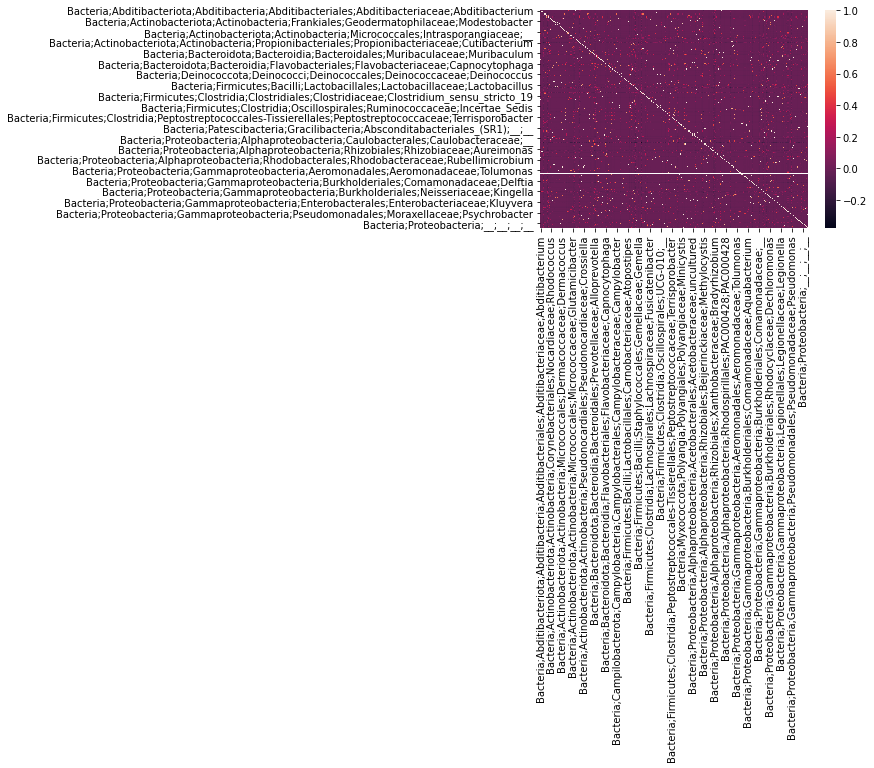

In [13]:
corr = df_final_select.corr()
sns.heatmap(corr)

In [57]:
# columns = np.full((corr.shape[0],), True, dtype=bool)
columns = df_final_select.columns
columns_not_select = []
for i in range(corr.shape[0]):
    for j in range(i+1, corr.shape[0]):
        if abs(corr.iloc[i,j]) >= 0.9:
          if columns[j]:
            columns_not_select.append(columns[j])
print(columns_not_select)
df_final_select2 = df_final_select.drop(columns_not_select,axis=1)
# selected_columns = df_final_select([columns],axis=1)
# df_final_select = df_final_select[selected_columns]
# print(columns.shape)
print(len(columns_not_select))

['Bacteria;Bacteroidota;Bacteroidia;Cytophagales;Hymenobacteraceae;Pontibacter', 'Bacteria;Proteobacteria;Gammaproteobacteria;Pseudomonadales;Moraxellaceae;Psychrobacter', 'Bacteria;Actinobacteriota;Actinobacteria;Micrococcales;Micrococcaceae;__', 'Bacteria;Firmicutes;Clostridia;Lachnospirales;Lachnospiraceae;Herbinix', 'Bacteria;Firmicutes;Clostridia;Oscillospirales;Ethanoligenenaceae;Ethanoligenens', 'Bacteria;Proteobacteria;Alphaproteobacteria;Rhodobacterales;Rhodobacteraceae;Pseudorhodobacter', 'Bacteria;Proteobacteria;Alphaproteobacteria;Rhizobiales;Xanthobacteraceae;Afipia', 'Bacteria;Firmicutes;Clostridia;Oscillospirales;Oscillospiraceae;UCG-005', 'Bacteria;Actinobacteriota;Actinobacteria;Propionibacteriales;Propionibacteriaceae;Propioniciclava', 'Bacteria;Actinobacteriota;Actinobacteria;Micrococcales;Intrasporangiaceae;Lapillicoccus', 'Bacteria;Deinococcota;Deinococci;Deinococcales;Deinococcaceae;Deinococcus', 'Bacteria;Firmicutes;Clostridia;Lachnospirales;Lachnospiraceae;Lachn

In [58]:
df_final_select2.head()

,Bacteria;Abditibacteriota;Abditibacteria;Abditibacteriales;Abditibacteriaceae;Abditibacterium,Bacteria;Acidobacteriota;Acidobacteriae;Subgroup_2;__;__,Bacteria;Actinobacteria;Actinobacteria;Actinomycetales;Actinomycetaceae;Actinomyces,Bacteria;Actinobacteriota;Acidimicrobiia;Microtrichales;Ilumatobacteraceae;uncultured,Bacteria;Actinobacteriota;Acidimicrobiia;uncultured;uncultured_forest_soil_bacterium;,Bacteria;Actinobacteriota;Actinobacteria;Actinomycetales;Actinomycetaceae;Actinomyces,Bacteria;Actinobacteriota;Actinobacteria;Actinomycetales;Actinomycetaceae;F0332,Bacteria;Actinobacteriota;Actinobacteria;Actinomycetales;Actinomycetaceae;Varibaculum,Bacteria;Actinobacteriota;Actinobacteria;Bifidobacteriales;Bifidobacteriaceae;Bifidobacterium,Bacteria;Actinobacteriota;Actinobacteria;Bifidobacteriales;Bifidobacteriaceae;Gardnerella,Bacteria;Actinobacteriota;Actinobacteria;Corynebacteriales;Corynebacteriaceae;Corynebacterium,Bacteria;Actinobacteriota;Actinobacteria;Corynebacteriales;Corynebacteriaceae;Lawsonella,Bacteria;Actinobacteriota;Actinobacteria;Corynebacteriales;Dietziaceae;Dietzia,Bacteria;Actinobacteriota;Actinobacteria;Corynebacteriales;Mycobacteriaceae;Mycobacterium,Bacteria;Actinobacteriota;Actinobacteria;Corynebacteriales;Nocardiaceae;Gordonia,Bacteria;Actinobacteriota;Actinobacteria;Corynebacteriales;Nocardiaceae;Rhodococcus,Bacteria;Actinobacteriota;Actinobacteria;Corynebacteriales;Nocardiaceae;Williamsia,Bacteria;Actinobacteriota;Actinobacteria;Frankiales;Geodermatophilaceae;Blastococcus,Bacteria;Actinobacteriota;Actinobacteria;Frankiales;Geodermatophilaceae;Modestobacter,Bacteria;Actinobacteriota;Actinobacteria;Frankiales;Sporichthyaceae;uncultured,Bacteria;Actinobacteriota;Actinobacteria;Frankiales;__;__,Bacteria;Actinobacteriota;Actinobacteria;Frankiales;uncultured;Actinomycetales_bacterium,Bacteria;Actinobacteriota;Actinobacteria;Frankiales;uncultured;__,Bacteria;Actinobacteriota;Actinobacteria;Kineosporiales;Kineosporiaceae;Quadrisphaera,Bacteria;Actinobacteriota;Actinobacteria;Micrococcales;Bogoriellaceae;Georgenia,Bacteria;Actinobacteriota;Actinobacteria;Micrococcales;Brevibacteriaceae;Brevibacterium,Bacteria;Actinobacteriota;Actinobacteria;Micrococcales;Dermabacteraceae;Dermabacter,Bacteria;Actinobacteriota;Actinobacteria;Micrococcales;Dermacoccaceae;Barrientosiimonas,Bacteria;Actinobacteriota;Actinobacteria;Micrococcales;Dermacoccaceae;Dermacoccus,Bacteria;Actinobacteriota;Actinobacteria;Micrococcales;Intrasporangiaceae;Janibacter,Bacteria;Actinobacteriota;Actinobacteria;Micrococcales;Intrasporangiaceae;Ornithinicoccus,Bacteria;Actinobacteriota;Actinobacteria;Micrococcales;Intrasporangiaceae;Ornithinimicrobium,Bacteria;Actinobacteriota;Actinobacteria;Micrococcales;Intrasporangiaceae;Serinicoccus,Bacteria;Actinobacteriota;Actinobacteria;Micrococcales;Intrasporangiaceae;__,Bacteria;Actinobacteriota;Actinobacteria;Micrococcales;Microbacteriaceae;Agrococcus,Bacteria;Actinobacteriota;Actinobacteria;Micrococcales;Microbacteriaceae;Amnibacterium,Bacteria;Actinobacteriota;Actinobacteria;Micrococcales;Microbacteriaceae;Curtobacterium,Bacteria;Actinobacteriota;Actinobacteria;Micrococcales;Microbacteriaceae;Microbacterium,Bacteria;Actinobacteriota;Actinobacteria;Micrococcales;Microbacteriaceae;Rhodoluna,Bacteria;Actinobacteriota;Actinobacteria;Micrococcales;Microbacteriaceae;__,...,Bacteria;Proteobacteria;Gammaproteobacteria;Burkholderiales;Comamonadaceae;Rhodoferax,Bacteria;Proteobacteria;Gammaproteobacteria;Burkholderiales;Comamonadaceae;Schlegelella,Bacteria;Proteobacteria;Gammaproteobacteria;Burkholderiales;Comamonadaceae;Tepidimonas,Bacteria;Proteobacteria;Gammaproteobacteria;Burkholderiales;Comamonadaceae;Variovorax,Bacteria;Proteobacteria;Gammaproteobacteria;Burkholderiales;Comamonadaceae;__,Bacteria;Proteobacteria;Gammaproteobacteria;Burkholderiales;Comamonadaceae;uncultured,Bacteria;Proteobacteria;Gammaproteobacteria;Burkholderiales;Neisseriaceae;Kingella,Bacteria;Proteobacteria;Gammaproteobacteria;Burkh

#Random Forest Classifier

In [16]:
#Use RandomForestClassifier to predict Clinical
x = df_final_select2
y = train["Clinical"]
# y = np.array(y,dtype=int)
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.4,random_state=0)

#RandomForest
rfc = RandomForestClassifier()
#rfc=RandomForestClassifier(n_estimators=100,n_jobs = -1,random_state =50, min_samples_leaf = 10)
rfc.fit(X_train,y_train)
y_predict = rfc.predict(X_train)
score_rfc = rfc.score(X_test,y_test)
print("Random Forest Accuracy = ",score_rfc*100," %")

Random Forest Accuracy =  38.46153846153847  %


In [17]:
from sklearn.model_selection import KFold
x = df_final_select2
y = train["Clinical"]
kf = KFold(n_splits=5)
best_accuracy = 0
for train_index , test_index in kf.split(x):
    X_train, X_test, y_train, y_test = x.iloc[train_index], x.iloc[test_index], y.iloc[train_index], y.iloc[test_index]
    rfc = RandomForestClassifier()
    rfc.fit(X_train,y_train)
    y_predict = rfc.predict(X_train)
    accuracy = rfc.score(X_test,y_test)
    print("Random Forest Accuracy = ",accuracy*100,"%")
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_rfc = rfc
print("Best Accuracy = ",best_accuracy*100,"%")

Random Forest Accuracy =  26.923076923076923 %
Random Forest Accuracy =  38.46153846153847 %
Random Forest Accuracy =  23.076923076923077 %
Random Forest Accuracy =  26.923076923076923 %
Random Forest Accuracy =  19.230769230769234 %
Best Accuracy =  38.46153846153847 %


In [18]:
#random forest final accuracy
x_train_new = x
y_train_new = train["Clinical"]
y_train_new = y_train_new.reset_index(drop=True)

y_pred = best_rfc.predict(x_train_new)
count = 0

for i in range(y_pred.shape[0]):
    if y_pred[i] != y_train_new[i]:
        count += 1
    # print(y_pred[i],y_train_new[i])
rfc_accuracy = 1-count/y_pred.shape[0]
print("Random Forest Accuracy = ",rfc_accuracy*100,"%")

Random Forest Accuracy =  87.6923076923077 %


#SVM

In [19]:
from sklearn import svm
#Use SVM to predict Clinical
x = df_final_select2
y = train["Clinical"]
# y = np.array(y,dtype=int)
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.4,random_state=0)

clf = svm.SVC()
clf.fit(X_train,y_train)
y_predict = clf.predict(X_train)
score_clf = clf.score(X_test,y_test)
print("SVM Accuracy = ",score_clf*100," %")

SVM Accuracy =  28.846153846153843  %


In [20]:
from sklearn.model_selection import KFold
x = df_final_select2
y = train["Clinical"]
kf = KFold(n_splits=5)
best_accuracy = 0
for train_index , test_index in kf.split(x):
    X_train, X_test, y_train, y_test = x.iloc[train_index], x.iloc[test_index], y.iloc[train_index], y.iloc[test_index]
    clf = svm.SVC()
    clf.fit(X_train,y_train)
    y_predict = clf.predict(X_train)
    accuracy = clf.score(X_test,y_test)
    print("SVM Accuracy = ",accuracy*100,"%")
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_clf = clf
print("Best Accuracy = ",best_accuracy*100,"%")

SVM Accuracy =  15.384615384615385 %
SVM Accuracy =  34.61538461538461 %
SVM Accuracy =  7.6923076923076925 %
SVM Accuracy =  19.230769230769234 %
SVM Accuracy =  26.923076923076923 %
Best Accuracy =  34.61538461538461 %


In [21]:
#SVM final accuracy
x_train_new = x
y_train_new = train["Clinical"]
y_train_new = y_train_new.reset_index(drop=True)

y_pred = best_clf.predict(x_train_new)
count = 0

for i in range(y_pred.shape[0]):
    # print(y_pred[i],y_train_new[i])
    if y_pred[i] != y_train_new[i]:
        count += 1
clf_accuracy = 1-count/y_pred.shape[0]
print("SVM Accuracy = ",clf_accuracy*100,"%")

SVM Accuracy =  72.3076923076923 %


#Neural network MLPClassifier

In [22]:
from sklearn.neural_network import MLPClassifier
#Use Neural Network MLPClassifier to predict Clinical
x = df_final_select2
y = train["Clinical"]
# y = np.array(y,dtype=int)
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.4,random_state=0)

nnclf = MLPClassifier(solver='adam', alpha=1e-5, hidden_layer_sizes=(50, 30), random_state=1, max_iter=2000)
nnclf.fit(X_train,y_train)
y_predict = nnclf.predict(X_train)
score_nnclf = nnclf.score(X_test,y_test)
print("Neural Network Accuracy = ",score_nnclf*100," %")

Neural Network Accuracy =  42.30769230769231  %


In [23]:
from sklearn.model_selection import KFold
x = df_final_select2
y = train["Clinical"]
kf = KFold(n_splits=5)
best_accuracy = 0
for train_index , test_index in kf.split(x):
    X_train, X_test, y_train, y_test = x.iloc[train_index], x.iloc[test_index], y.iloc[train_index], y.iloc[test_index]
    nnclf = MLPClassifier(solver='adam', alpha=1e-5, hidden_layer_sizes=(50, 30), random_state=1, max_iter=2000)
    nnclf.fit(X_train,y_train)
    y_predict = nnclf.predict(X_train)
    accuracy = nnclf.score(X_test,y_test)
    print("NN Accuracy = ",accuracy*100,"%")
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_nnclf = nnclf
print("NN Accuracy = ",best_accuracy*100,"%")

NN Accuracy =  23.076923076923077 %
NN Accuracy =  38.46153846153847 %
NN Accuracy =  34.61538461538461 %
NN Accuracy =  34.61538461538461 %
NN Accuracy =  19.230769230769234 %
NN Accuracy =  38.46153846153847 %


In [24]:
#NN final accuracy
x_train_new = x
y_train_new = train["Clinical"]
y_train_new = y_train_new.reset_index(drop=True)

y_pred = best_nnclf.predict(x_train_new)
count = 0

for i in range(y_pred.shape[0]):
    # print(y_pred[i],y_train_new[i])
    if y_pred[i] != y_train_new[i]:
        count += 1
nnclf_accuracy = 1-count/y_pred.shape[0]
print("NN Accuracy = ",nnclf_accuracy*100,"%")

NN Accuracy =  87.6923076923077 %


#Logistic Regression

In [25]:
from sklearn.linear_model import LogisticRegression
#Use Logistic Regression to predict Clinical
x = df_final_select2
y = train["Clinical"]
# y = np.array(y,dtype=int)
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.4,random_state=0)

logclf = LogisticRegression(random_state=0).fit(X_train,y_train)
logclf.predict(X_train)
logclf.predict_proba(X_train)
score_logclf = logclf.score(X_test,y_test)
print("Logistic Regression Accuracy = ",score_logclf*100," %")

Logistic Regression Accuracy =  26.923076923076923  %


In [26]:
from sklearn.model_selection import KFold
x = df_final_select2
y = train["Clinical"]
kf = KFold(n_splits=5)
best_accuracy = 0
for train_index , test_index in kf.split(x):
    X_train, X_test, y_train, y_test = x.iloc[train_index], x.iloc[test_index], y.iloc[train_index], y.iloc[test_index]
    logclf = LogisticRegression(random_state=0).fit(X_train,y_train)
    y_predict = logclf.predict(X_train)
    accuracy = logclf.score(X_test,y_test)
    print("Logistic Regression Accuracy = ",accuracy*100,"%")
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_logclf = logclf
print("Logistic Regression Accuracy = ",best_accuracy*100,"%")

Logistic Regression Accuracy =  7.6923076923076925 %
Logistic Regression Accuracy =  19.230769230769234 %
Logistic Regression Accuracy =  11.538461538461538 %
Logistic Regression Accuracy =  11.538461538461538 %
Logistic Regression Accuracy =  19.230769230769234 %
Logistic Regression Accuracy =  19.230769230769234 %


In [27]:
#Logistic final accuracy
x_train_new = x
y_train_new = train["Clinical"]
y_train_new = y_train_new.reset_index(drop=True)

y_pred = best_logclf.predict(x_train_new)
count = 0

for i in range(y_pred.shape[0]):
    # print(y_pred[i],y_train_new[i])
    if y_pred[i] != y_train_new[i]:
        count += 1
logclf_accuracy = 1-count/y_pred.shape[0]
print("Logistic Regression Accuracy = ",logclf_accuracy*100,"%")

Logistic Regression Accuracy =  46.15384615384615 %


#DNN

In [28]:
import os
import numpy as np
import keras as K
import tensorflow as tf
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer
os.environ['TF_CPP_MIN_LOG_LEVEL']= '2'

In [29]:
target_var = 'Clinical'
features = list(df_final_select2.columns)
# 目標變量的類別
Class = train[target_var].unique()
# 目標變量的類別字典
Class_dict = dict(zip(Class, range(len(Class))))
# 增加一列target, 將目標變量進行編碼
train['target'] = train[target_var].apply(lambda x: Class_dict[x])
# 對目標變量進行0-1編碼(One-hot Encoding)
lb = LabelBinarizer()
lb.fit(list(Class_dict.values()))
transformed_labels = lb.transform(train['target'])
y_bin_labels = []  # 對多分類進行0-1編碼的變量
for i in range(transformed_labels.shape[1]):
    y_bin_labels.append( 'y' + str(i))
    train['y' + str(i)] = transformed_labels[:, i]
# 將數據集分為訓練集和測試集
train_x, test_x, train_y, test_y = train_test_split(df_final_select2[features], train[y_bin_labels], train_size=0.6, test_size=0.4, random_state=0)

In [30]:
np.random.seed(5)
# model
init = K.initializers.glorot_uniform(seed=1)
optimizer = K.optimizers.Adam()
model = K.models.Sequential()
model.add(K.layers.Dense(units=1024, input_dim=247, kernel_initializer=init, activation='relu'))
model.add(K.layers.Dense(units=2048, kernel_initializer=init, activation= 'relu'))
model.add(K.layers.Dense(units=1024, kernel_initializer=init, activation= 'relu'))
model.add(K.layers.Dense(units=3, kernel_initializer=init, activation='relu'))
model.compile(loss = 'categorical_crossentropy', optimizer = optimizer, metrics = ['accuracy'])

In [31]:
# 訓練模型
b_size = 1
max_epochs = 50
print("Starting training ")
h = model.fit(train_x, train_y, batch_size=b_size, epochs=max_epochs, shuffle=True, verbose=1)
print("Training finished \n")

Starting training 
Epoch 1/50
78/78 [==============================] - 14s 3ms/step - loss: 11.2083 - accuracy: 0.2687
Epoch 2/50
78/78 [==============================] - 0s 3ms/step - loss: 11.1680 - accuracy: 0.3071
Epoch 3/50
78/78 [==============================] - 0s 2ms/step - loss: 11.4910 - accuracy: 0.2871
Epoch 4/50
78/78 [==============================] - 0s 2ms/step - loss: 11.6481 - accuracy: 0.2773
Epoch 5/50
78/78 [==============================] - 0s 2ms/step - loss: 12.4851 - accuracy: 0.2254
Epoch 6/50
78/78 [==============================] - 0s 3ms/step - loss: 12.3439 - accuracy: 0.2342
Epoch 7/50
78/78 [==============================] - 0s 2ms/step - loss: 12.6985 - accuracy: 0.2122
Epoch 8/50
78/78 [==============================] - 0s 3ms/step - loss: 10.5866 - accuracy: 0.3432
Epoch 9/50
78/78 [==============================] - 0s 2ms/step - loss: 11.5042 - accuracy: 0.2863
Epoch 10/50
78/78 [==============================] - 0s 2ms/step - loss: 9.9297 - accurac

In [32]:
eval = model.evaluate(test_x, test_y, verbose=0)
print("Evaluation on test data: loss = %0.6f accuracy = %0.2f%% \n" % (eval[0], eval[1] * 100))

Evaluation on test data: loss = 8.988938 accuracy = 44.23% 



#PH-CNN
##reference:
###https://github.com/dfioravanti/phylogenetic-cnn
###https://www.tensorflow.org/tutorials/images/cnn

In [33]:
from tensorflow.keras import datasets, layers, models

##Reshape input
因為去除correlation大於0.9的資料會剩下247筆，不好把二維資料reshape成四維  
因此需稍微修改所選擇的correlation臨界值

In [35]:
# columns = np.full((corr.shape[0],), True, dtype=bool)
columns = df_final_select.columns
columns_not_select = []
for i in range(corr.shape[0]):
    for j in range(i+1, corr.shape[0]):
        if corr.iloc[i,j] >= 0.94:
            if columns[j]:
              columns_not_select.append(columns[j])
print(columns_not_select)
df_final_select3 = df_final_select.drop(columns_not_select,axis=1)
# selected_columns = df_final_select([columns],axis=1)
# df_final_select = df_final_select[selected_columns]
# print(columns.shape)
print(len(columns_not_select))

['Bacteria;Bacteroidota;Bacteroidia;Cytophagales;Hymenobacteraceae;Pontibacter', 'Bacteria;Proteobacteria;Gammaproteobacteria;Pseudomonadales;Moraxellaceae;Psychrobacter', 'Bacteria;Actinobacteriota;Actinobacteria;Micrococcales;Micrococcaceae;__', 'Bacteria;Firmicutes;Clostridia;Lachnospirales;Lachnospiraceae;Herbinix', 'Bacteria;Firmicutes;Clostridia;Oscillospirales;Ethanoligenenaceae;Ethanoligenens', 'Bacteria;Proteobacteria;Alphaproteobacteria;Rhodobacterales;Rhodobacteraceae;Pseudorhodobacter', 'Bacteria;Proteobacteria;Alphaproteobacteria;Rhizobiales;Xanthobacteraceae;Afipia', 'Bacteria;Firmicutes;Clostridia;Oscillospirales;Oscillospiraceae;UCG-005', 'Bacteria;Proteobacteria;Alphaproteobacteria;Acetobacterales;Acetobacteraceae;Roseococcus', 'Bacteria;Proteobacteria;Alphaproteobacteria;Caulobacterales;Caulobacteraceae;__', 'Bacteria;Proteobacteria;Gammaproteobacteria;Burkholderiales;Neisseriaceae;__', 'Bacteria;Proteobacteria;Gammaproteobacteria;Enterobacterales;Enterobacteriaceae;E

In [36]:
df_final_select3.head()

,Bacteria;Abditibacteriota;Abditibacteria;Abditibacteriales;Abditibacteriaceae;Abditibacterium,Bacteria;Acidobacteriota;Acidobacteriae;Subgroup_2;__;__,Bacteria;Actinobacteria;Actinobacteria;Actinomycetales;Actinomycetaceae;Actinomyces,Bacteria;Actinobacteriota;Acidimicrobiia;Microtrichales;Ilumatobacteraceae;uncultured,Bacteria;Actinobacteriota;Acidimicrobiia;uncultured;uncultured_forest_soil_bacterium;,Bacteria;Actinobacteriota;Actinobacteria;Actinomycetales;Actinomycetaceae;Actinomyces,Bacteria;Actinobacteriota;Actinobacteria;Actinomycetales;Actinomycetaceae;F0332,Bacteria;Actinobacteriota;Actinobacteria;Actinomycetales;Actinomycetaceae;Varibaculum,Bacteria;Actinobacteriota;Actinobacteria;Bifidobacteriales;Bifidobacteriaceae;Bifidobacterium,Bacteria;Actinobacteriota;Actinobacteria;Bifidobacteriales;Bifidobacteriaceae;Gardnerella,Bacteria;Actinobacteriota;Actinobacteria;Corynebacteriales;Corynebacteriaceae;Corynebacterium,Bacteria;Actinobacteriota;Actinobacteria;Corynebacteriales;Corynebacteriaceae;Lawsonella,Bacteria;Actinobacteriota;Actinobacteria;Corynebacteriales;Dietziaceae;Dietzia,Bacteria;Actinobacteriota;Actinobacteria;Corynebacteriales;Mycobacteriaceae;Mycobacterium,Bacteria;Actinobacteriota;Actinobacteria;Corynebacteriales;Nocardiaceae;Gordonia,Bacteria;Actinobacteriota;Actinobacteria;Corynebacteriales;Nocardiaceae;Rhodococcus,Bacteria;Actinobacteriota;Actinobacteria;Corynebacteriales;Nocardiaceae;Williamsia,Bacteria;Actinobacteriota;Actinobacteria;Frankiales;Geodermatophilaceae;Blastococcus,Bacteria;Actinobacteriota;Actinobacteria;Frankiales;Geodermatophilaceae;Modestobacter,Bacteria;Actinobacteriota;Actinobacteria;Frankiales;Sporichthyaceae;uncultured,Bacteria;Actinobacteriota;Actinobacteria;Frankiales;__;__,Bacteria;Actinobacteriota;Actinobacteria;Frankiales;uncultured;Actinomycetales_bacterium,Bacteria;Actinobacteriota;Actinobacteria;Frankiales;uncultured;__,Bacteria;Actinobacteriota;Actinobacteria;Kineosporiales;Kineosporiaceae;Quadrisphaera,Bacteria;Actinobacteriota;Actinobacteria;Micrococcales;Bogoriellaceae;Georgenia,Bacteria;Actinobacteriota;Actinobacteria;Micrococcales;Brevibacteriaceae;Brevibacterium,Bacteria;Actinobacteriota;Actinobacteria;Micrococcales;Dermabacteraceae;Dermabacter,Bacteria;Actinobacteriota;Actinobacteria;Micrococcales;Dermacoccaceae;Barrientosiimonas,Bacteria;Actinobacteriota;Actinobacteria;Micrococcales;Dermacoccaceae;Dermacoccus,Bacteria;Actinobacteriota;Actinobacteria;Micrococcales;Intrasporangiaceae;Janibacter,Bacteria;Actinobacteriota;Actinobacteria;Micrococcales;Intrasporangiaceae;Lapillicoccus,Bacteria;Actinobacteriota;Actinobacteria;Micrococcales;Intrasporangiaceae;Ornithinicoccus,Bacteria;Actinobacteriota;Actinobacteria;Micrococcales;Intrasporangiaceae;Ornithinimicrobium,Bacteria;Actinobacteriota;Actinobacteria;Micrococcales;Intrasporangiaceae;Serinicoccus,Bacteria;Actinobacteriota;Actinobacteria;Micrococcales;Intrasporangiaceae;__,Bacteria;Actinobacteriota;Actinobacteria;Micrococcales;Microbacteriaceae;Agrococcus,Bacteria;Actinobacteriota;Actinobacteria;Micrococcales;Microbacteriaceae;Amnibacterium,Bacteria;Actinobacteriota;Actinobacteria;Micrococcales;Microbacteriaceae;Curtobacterium,Bacteria;Actinobacteriota;Actinobacteria;Micrococcales;Microbacteriaceae;Microbacterium,Bacteria;Actinobacteriota;Actinobacteria;Micrococcales;Microbacteriaceae;Rhodoluna,...,Bacteria;Proteobacteria;Gammaproteobacteria;Burkholderiales;Comamonadaceae;Rhodoferax,Bacteria;Proteobacteria;Gammaproteobacteria;Burkholderiales;Comamonadaceae;Schlegelella,Bacteria;Proteobacteria;Gammaproteobacteria;Burkholderiales;Comamonadaceae;Tepidimonas,Bacteria;Proteobacteria;Gammaproteobacteria;Burkholderiales;Comamonadaceae;Variovorax,Bacteria;Proteobacteria;Gammaproteobacteria;Burkholderiales;Comamonadaceae;__,Bacteria;Proteobacteria;Gammaproteobacteria;Burkholderiales;Comamonadaceae;uncultured,Bacteria;Proteobacteria;Gammaproteobacteria;Burkholderiales;Neisseriaceae;Kingella,Bacteria;Proteobacteria;Gammaproteoba

In [37]:
target_var = 'Clinical'
features = list(df_final_select3.columns)
# 目標變量的類別
Class = train[target_var].unique()
# 目標變量的類別字典
Class_dict = dict(zip(Class, range(len(Class))))
# 增加一列target, 將目標變量進行編碼
train['target'] = train[target_var].apply(lambda x: Class_dict[x])
# 對目標變量進行0-1編碼(One-hot Encoding)
lb = LabelBinarizer()
lb.fit(list(Class_dict.values()))
transformed_labels = lb.transform(train['target'])
y_bin_labels = []  # 對多分類進行0-1編碼的變量
for i in range(transformed_labels.shape[1]):
    y_bin_labels.append( 'y' + str(i))
    train['y' + str(i)] = transformed_labels[:, i]
# 將數據集分為訓練集和測試集
train_x, test_x, train_y, test_y = train_test_split(df_final_select3[features], train[y_bin_labels], train_size=0.6, test_size=0.4, random_state=0)

In [38]:
train_x.shape

(78, 256)

In [43]:
#reshape train_x
# train_x = train_x.values.reshape(78, 8, 8, 4)
# train_x = train_x.reshape(78, 8, 8, 4)
# test_x = test_x.values.reshape(52, 8, 8, 4)
# test_x = test_x.reshape(52, 8, 8, 4)

# train_x = train_x.values.reshape(78, 4, 4, 16)
train_x = train_x.reshape(78, 4, 4, 16)
# test_x = test_x.values.reshape(52, 4, 4, 16)
test_x = test_x.reshape(52, 4, 4, 16)

## Model(Same as paper)

In [44]:
model = K.models.Sequential()
model.add(K.layers.Conv2D(16, (3, 3), activation='relu', input_shape=train_x.shape[1:]))
model.add(K.layers.MaxPooling2D((2, 2)))
model.add(K.layers.Flatten())
model.add(K.layers.Dense(64, activation= 'relu'))
model.add(K.layers.Dropout(0.25))
model.add(K.layers.Dense(3,activation='sigmoid'))
# model.add(K.layers.Conv2D(64, (1, 1), activation='sigmoid'))
# model.add(K.layers.MaxPooling2D((2, 2)))
# model.add(K.layers.Conv2D(64, (3, 3), activation='relu'))

In [45]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 2, 2, 16)          2320      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 1, 1, 16)          0         
_________________________________________________________________
flatten (Flatten)            (None, 16)                0         
_________________________________________________________________
dense_4 (Dense)              (None, 64)                1088      
_________________________________________________________________
dropout (Dropout)            (None, 64)                0         
_________________________________________________________________
dense_5 (Dense)              (None, 3)                 195       
Total params: 3,603
Trainable params: 3,603
Non-trainable params: 0
____________________________________________________

In [47]:
opt = K.optimizers.Adam(lr=0.0005)
# opt = K.optimizers.Adam(lr=0.0005)
model.compile(optimizer=opt, loss='categorical_crossentropy',
        metrics=['accuracy'])

h2 = model.fit(train_x, train_y, epochs=1, batch_size=1,
      validation_data=(test_x, test_y))

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


78/78 [==============================] - 31s 7ms/step - loss: 1.1008 - accuracy: 0.2448 - val_loss: 1.0963 - val_accuracy: 0.4423


##Model 2
Activation = relu  
No Dropout

In [55]:
model = K.models.Sequential()
model.add(K.layers.Conv2D(16, (3, 3), activation='relu', input_shape=train_x.shape[1:]))
model.add(K.layers.MaxPooling2D((2, 2)))
model.add(K.layers.Flatten())
model.add(K.layers.Dense(64, activation= 'relu'))
# model.add(K.layers.Dropout(0.25))
model.add(K.layers.Dense(3,activation='relu'))

In [49]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 2, 2, 16)          2320      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 1, 1, 16)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 16)                0         
_________________________________________________________________
dense_6 (Dense)              (None, 64)                1088      
_________________________________________________________________
dense_7 (Dense)              (None, 3)                 195       
Total params: 3,603
Trainable params: 3,603
Non-trainable params: 0
_________________________________________________________________


In [56]:
opt = K.optimizers.Adam(lr=0.002, decay=1e-2)
model.compile(optimizer=opt, loss='categorical_crossentropy',
        metrics=['accuracy'])

h2 = model.fit(train_x, train_y, epochs=1, batch_size=1,
      validation_data=(test_x, test_y))

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


78/78 [==============================] - 1s 7ms/step - loss: nan - accuracy: 0.3285 - val_loss: 8.9889 - val_accuracy: 0.4423
